In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shl-intern-hiring-assessment/dataset/sample_submission.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_885.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_698.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1176.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1215.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_66.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_386.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_1026.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_330.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_72.wav
/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test/audio_858.wav
/kaggle/input/shl-intern-hiring-ass

In [2]:
# Load model directly
from transformers import AutoProcessor, AutoModelForCTC

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base-960h")
model = AutoModelForCTC.from_pretrained("facebook/wav2vec2-base-960h")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.29.0
    Uninstalling huggingface-hub-0.29.0:
      Successfully uninstalled huggingface-hub-0.29.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
!git lfs install
!git clone https://huggingface.co/facebook/wav2vec2-base-960h

Git LFS initialized.
Cloning into 'wav2vec2-base-960h'...
remote: Enumerating objects: 118, done.
remote: Total 118 (delta 0), reused 0 (delta 0), pack-reused 118 (from 1)
Receiving objects: 100% (118/118), 15.08 KiB | 5.03 MiB/s, done.
Resolving deltas: 100% (67/67), done.
Filtering content: 100% (3/3), 1.05 GiB | 124.82 MiB/s, done.


In [5]:
# !pip install librosa xgboost --quiet


# import os
# import numpy as np
# import pandas as pd
# import librosa
# import torch
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import pearsonr
# from xgboost import XGBRegressor
# import matplotlib.pyplot as plt
# import seaborn as sns


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")



# AUDIO_TRAIN_DIR = '/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train'
# AUDIO_TEST_DIR = '/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test'
# TRAIN_CSV = '/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv'
# TEST_CSV = '/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv'
# MODEL_PATH = '/kaggle/working/wav2vec2-base-960h' 


# def load_local_model():
#     """Load model from local Kaggle dataset"""
#     from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2Model
    

#     required_files = ['preprocessor_config.json', 'config.json', 'pytorch_model.bin']
#     for f in required_files:
#         if not os.path.exists(os.path.join(MODEL_PATH, f)):
#             raise FileNotFoundError(f"Missing model file: {f}")
    
#     feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(MODEL_PATH)
#     model = Wav2Vec2Model.from_pretrained(MODEL_PATH).to(device)
#     return feature_extractor, model

# feature_extractor, model = load_local_model()
# print("Model loaded successfully from local files!")


# def load_data(csv_path, audio_dir):
#     df = pd.read_csv(csv_path)
#     print(f"Loaded {len(df)} samples from {csv_path}")
#     return df

# train_df = load_data(TRAIN_CSV, AUDIO_TRAIN_DIR)
# test_df = load_data(TEST_CSV, AUDIO_TEST_DIR)


# def extract_features(audio_path):
#     try:
#         audio, sr = librosa.load(audio_path, sr=16000)
#         inputs = feature_extractor(
#             audio, 
#             sampling_rate=sr, 
#             return_tensors='pt',
#             padding=True
#         ).to(device)
        
#         with torch.no_grad():
#             outputs = model(**inputs)
            
#         return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
#     except Exception as e:
#         print(f"Error processing {audio_path}: {e}")
#         return None

# train_features, train_labels = [], []
# for idx, row in train_df.iterrows():
#     audio_path = os.path.join(AUDIO_TRAIN_DIR, row['filename'])  # Changed 'file_name' to 'filename'
#     features = extract_features(audio_path)
#     if features is not None:
#         train_features.append(features)
#         train_labels.append(row['label'])  # Keep this as 'label' if that's your score column

# X_train = np.array(train_features)
# y_train = np.array(train_labels)
# print(f"Training features shape: {X_train.shape}")


# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=42
# )


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_split)
# X_val_scaled = scaler.transform(X_val_split)


# xgb_model = XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=1000,
#     learning_rate=0.05,
#     early_stopping_rounds=50,
#     random_state=42
# )

# xgb_model.fit(
#     X_train_scaled, 
#     y_train_split, 
#     eval_set=[(X_val_scaled, y_val_split)], 
#     verbose=10
# )


# y_val_pred = xgb_model.predict(X_val_scaled)
# pearson_val = pearsonr(y_val_split, y_val_pred)[0]
# mse_val = mean_squared_error(y_val_split, y_val_pred)

# print(f"\nValidation Pearson Correlation: {pearson_val:.4f}")
# print(f"Validation MSE: {mse_val:.4f}")

# # Visualization
# plt.figure(figsize=(10, 6))
# sns.regplot(x=y_val_split, y=y_val_pred, line_kws={'color': 'red'})
# plt.title(f'Actual vs Predicted Scores (Pearson: {pearson_val:.2f})')
# plt.xlabel('Actual Scores')
# plt.ylabel('Predicted Scores')
# plt.show()


# test_features, test_files = [], []
# for idx, row in test_df.iterrows():
#     audio_path = os.path.join(AUDIO_TEST_DIR, row['filename'])  
#     features = extract_features(audio_path)
#     if features is not None:
#         test_features.append(features)
#         test_files.append(row['filename'])

# # Generate predictions
# test_pred = xgb_model.predict(X_test_scaled)

# # Create submission
# submission_df = pd.DataFrame({
#     'file_name': test_files,
#     'label': np.clip(test_pred, 0, 5) 
# })

# # Save submission
# submission_path = '/kaggle/working/submission.csv'
# submission_df.to_csv(submission_path, index=False)
# print(f"Submission saved to {submission_path}")
# print("First 5 predictions:")
# print(submission_df.head())

Using device: cuda


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at /kaggle/working/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded successfully!
Train samples: 444, Test samples: 195
[0]	validation_0-rmse:1.15711
[10]	validation_0-rmse:1.09666
[20]	validation_0-rmse:1.05275
[30]	validation_0-rmse:1.02840
[40]	validation_0-rmse:1.00859
[50]	validation_0-rmse:0.99689
[60]	validation_0-rmse:0.99024
[70]	validation_0-rmse:0.98570
[80]	validation_0-rmse:0.98167
[90]	validation_0-rmse:0.97912
[100]	validation_0-rmse:0.97696
[110]	validation_0-rmse:0.97565
[120]	validation_0-rmse:0.97523
[130]	validation_0-rmse:0.97539
[140]	validation_0-rmse:0.97524
[150]	validation_0-rmse:0.97485
[160]	validation_0-rmse:0.97486
[170]	validation_0-rmse:0.97488
[180]	validation_0-rmse:0.97476
[190]	validation_0-rmse:0.97470
[200]	validation_0-rmse:0.97463
[210]	validation_0-rmse:0.97458
[220]	validation_0-rmse:0.97457
[230]	validation_0-rmse:0.97457
[240]	validation_0-rmse:0.97460
[250]	validation_0-rmse:0.97460
[260]	validation_0-rmse:0.97457
[270]	validation_0-rmse:0.97456
[280]	validation_0-rmse:0.97456
[281]	validation_0

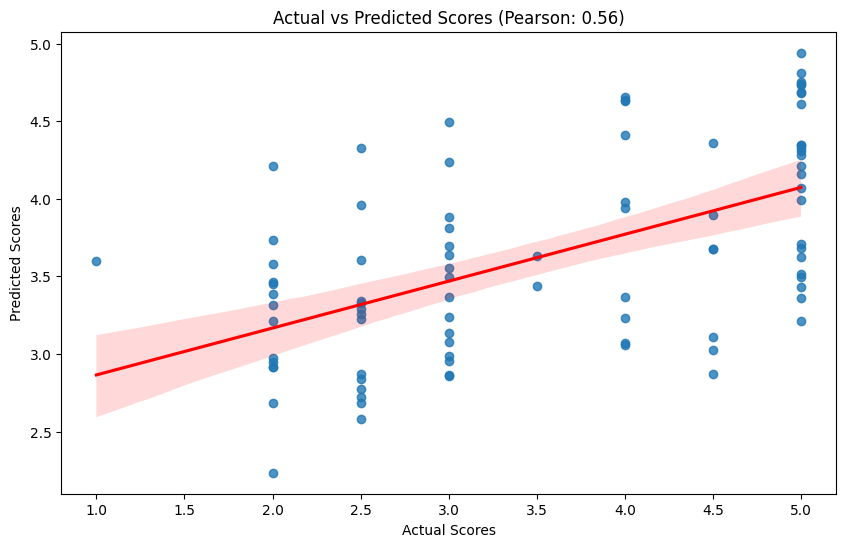

Submission file created!


In [6]:
# %% [code] -- Installations (no internet needed)
!pip install librosa xgboost scikit-learn --quiet

# %% [code] -- Imports
import os
import numpy as np
import pandas as pd
import librosa
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Added missing import
from scipy.stats import pearsonr
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# %% [code] -- Path Configuration

AUDIO_TRAIN_DIR = '/kaggle/input/shl-intern-hiring-assessment/dataset/audios_train'
AUDIO_TEST_DIR = '/kaggle/input/shl-intern-hiring-assessment/dataset/audios_test'
TRAIN_CSV = '/kaggle/input/shl-intern-hiring-assessment/dataset/train.csv'
TEST_CSV = '/kaggle/input/shl-intern-hiring-assessment/dataset/test.csv'
MODEL_PATH = '/kaggle/working/wav2vec2-base-960h' 

# %% [code] -- Load Model
from transformers import Wav2Vec2FeatureExtractor, Wav2Vec2Model

try:
    feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(MODEL_PATH)
    model = Wav2Vec2Model.from_pretrained(MODEL_PATH).to(device)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Verify model files exist at:", MODEL_PATH)
    print("Required files: preprocessor_config.json, config.json, pytorch_model.bin")
    raise

# %% [code] -- Data Loading
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

# %% [code] -- Feature Extraction
def extract_features(audio_path):
    try:
        audio, sr = librosa.load(audio_path, sr=16000)
        inputs = feature_extractor(
            audio, 
            sampling_rate=sr, 
            return_tensors='pt',
            padding=True
        ).to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
            
        return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

# Process training data
train_features, train_labels = [], []
for idx, row in train_df.iterrows():
    audio_path = os.path.join(AUDIO_TRAIN_DIR, row['filename'])
    features = extract_features(audio_path)
    if features is not None:
        train_features.append(features)
        train_labels.append(row['label'])

X_train = np.array(train_features)
y_train = np.array(train_labels)

# %% [code] -- Model Training
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    early_stopping_rounds=50,
    random_state=42
)

xgb_model.fit(
    X_train_scaled, 
    y_train_split, 
    eval_set=[(X_val_scaled, y_val_split)], 
    verbose=10
)

# %% [code] -- Evaluation
y_val_pred = xgb_model.predict(X_val_scaled)
pearson_val = pearsonr(y_val_split, y_val_pred)[0]
mse_val = mean_squared_error(y_val_split, y_val_pred)  # Now properly imported

print(f"\nValidation Metrics:")
print(f"Pearson Correlation: {pearson_val:.4f}")
print(f"MSE: {mse_val:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=y_val_split, y=y_val_pred, line_kws={'color': 'red'})
plt.title(f'Actual vs Predicted Scores (Pearson: {pearson_val:.2f})')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# %% [code] -- Test Predictions
test_features, test_files = [], []
for idx, row in test_df.iterrows():
    audio_path = os.path.join(AUDIO_TEST_DIR, row['filename'])
    features = extract_features(audio_path)
    if features is not None:
        test_features.append(features)
        test_files.append(row['filename'])

X_test = np.array(test_features)
X_test_scaled = scaler.transform(X_test)
test_pred = xgb_model.predict(X_test_scaled)

# Create submission
submission_df = pd.DataFrame({
    'filename': test_files,
    'label': np.clip(test_pred, 0, 5)  # Clip scores to 0-5 range
})
submission_df.to_csv('submission.csv', index=False)
print("Submission file created!")

In [7]:
!ls /kaggle/working/

__notebook__.ipynb  submission.csv  wav2vec2-base-960h


In [8]:
!cd /kaggle/working/
